Error: 0.06614137226206705-- a:1.8600662368042573, b:-0.7962243178421666
Error: 0.01831248988715221-- a:1.3533605603913972, b:-0.6206735673234249
Error: 0.011422762970211432-- a:1.1032234861838637, b:-0.347590814908577
Error: 0.007176247674245229-- a:0.9068452261129998, b:-0.13319830250762849
Error: 0.004558888179990802-- a:0.7526720746347259, b:0.03511752470395558
Error: 0.0029456664570710407-- a:0.6316334187867452, b:0.16725934893398114
Error: 0.0019513497294632626-- a:0.536608078323685, b:0.2710015934995427
Error: 0.0013384979802249415-- a:0.4620053386711436, b:0.35244782273250697
Error: 0.0009607639482851434-- a:0.40343602719544874, b:0.416389838678349
Error: 0.0007279458172072266-- a:0.35745428091221954, b:0.4665896016596849
1.6930984012182055
0.037219754002487955


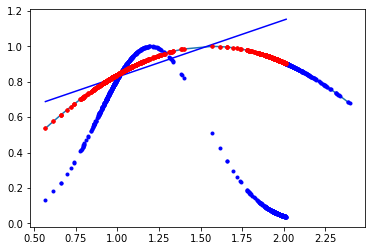

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import math
%matplotlib inline

boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target,columns=['target'])
data = pd.concat([features,target],axis=1)
x = data['RM']
X1 = sorted(np.array(x/x.mean()))
X=X1+[i+1 for i in X1]
Y=np.sin(X)
plt.plot(X,Y)
n = int(0.8 * len(X))
x_train = X[:n]
y_train = Y[:n]
x_test = X[n:]
y_test = Y[n:]
w=np.exp([-(1.2-i)**2/(2*0.1) for i in x_train])
plt.plot(x_train, y_train,'r.')
plt.plot(x_train,w,'b.')

def h(x,a,b):
    return a*x + b

def error(a,x,b,y,w):
    e = 0
    m = len(x)
    for i in range(m):
        e += np.power(h(x[i],a,b)-y[i],2)*w[i]
    return (1/(2*m)) * e

def step_gradient(a,x,b,y,learning_rate,w):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += (2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b += (2/m)*(h(x[i],a,b)-y[i])*w[i]
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b

def descend(initial_a, initial_b, x, y, learning_rate, iterations,w):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a,x,b,y,w)
        if i%1000 == 0:
            print(f"Error: {e}-- a:{a}, b:{b}")
        a, b = step_gradient(a,x,b,y, learning_rate,w)
    return a,b

a = 1.8600662368042573
b = -0.7962243178421666
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train,y_train, learning_rate, iterations,w)
H=[i*final_a+final_b for i in x_train]
plt.plot(x_train, y_train,'r.',x_train, H,'b')
print(error(a,x_test,b,y_test,w))
print(error(final_a,x_test, final_b,y_test,w)) 
plt.plot(x_test,y_test,'b.',x_train,y_train,'r.')